# Introduction to Data Analysis with Siuba: Basics

TODO:

* arguments separated by commas
* some about functions explained

**Pre-requisite concepts**

* how to run code
* comments
* changing contents of a string

**All concepts**

Identifying

* variable
* DataFrame output
* plotting code

Constructing

* comment
* string
* siu expression, verb, pipe
* arrange, filter, mutate, select


In [1]:
# TODO: explain how to run this, and that they only need the gist (loads tools)
import pandas as pd
from siuba import arrange, select, mutate, filter, _
from plotnine import ggplot, geom_point, coord_flip, aes, labs

# temporary until I figure out where to put data
url = "https://siublocks.s3.us-east-2.amazonaws.com/music_top200.csv"
music_top200 = pd.read_csv(url)


# TODO: shift into a package or file
from siuba import pipe
from IPython.display import HTML, display
___ = pipe(lambda x: display(HTML("⚠️: <b>Don't forget to replace all the blanks!<b>")) and _)

pd.set_option("display.max_rows", 6)




## Introduction to Spotify data

* concept of a variable - 
* this is a DataFrame
* number of rows and columns

The data we'll use is held in a **DataFrame**. A DataFrame is a big table of data, made up of rows and columns. In the example below, the **variable** `music_top200` let's us refer to and work on the data.

Notice that in the bottom-left of the table, it shows the number of rows and columns. This data has 12,417 rows and 22 columns.


In [2]:
music_top200

,country,country_code,position,track_name,artist,streams,track_id,danceability,energy,key,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,track_href,analysis_url,duration_ms,time_signature
0,United States,us,1,The Box,Roddy Ricch,12987027,0nbXyq5TXYPCO7pr3N8S4I,0.896,0.586,10.0,...,0.0559,0.1040,0.00000,0.790,0.642,116.971,https://api.spotify.com/v1/tracks/0nbXyq5TXYPC...,https://api.spotify.com/v1/audio-analysis/0nbX...,196653.0,4.0
1,United States,us,2,Myron,Lil Uzi Vert,9163134,56uXDJRCuoS7abX3SkzHKQ,0.770,0.655,8.0,...,0.2960,0.0537,0.00000,0.215,0.584,155.039,https://api.spotify.com/v1/tracks/56uXDJRCuoS7...,https://api.spotify.com/v1/audio-analysis/56uX...,224955.0,4.0
2,United States,us,3,Blueberry Faygo,Lil Mosey,8043475,22LAwLoDA5b4AaGSkg6bKW,0.774,0.554,0.0,...,0.0383,0.2070,0.00000,0.132,0.349,99.034,https://api.spotify.com/v1/tracks/22LAwLoDA5b4...,https://api.spotify.com/v1/audio-analysis/22LA...,162547.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12414,South Africa,za,198,Black And White,Niall Horan,11771,7rpNuuoMbid56XkDsx2FjE,0.443,0.582,2.0,...,0.0482,0.0301,0.00000,0.127,0.239,147.589,https://api.spotify.com/v1/tracks/7rpNuuoMbid5...,https://api.spotify.com/v1/audio-analysis/7rpN...,193090.0,4.0
12415,South Africa,za,199,When I See U,Fantasia,11752,4iuNZTcvT9diFySSzVsnVS,0.569,0.596,8.0,...,0.1710,0.4570,0.00009,0.205,0.757,93.134,https://api.spotify.com/v1/tracks/4iuNZTcvT9di...,https://api.spotify.com/v1/audio-analysis/4iuN...,217347.0,4.0
12416,South Africa,za,200,Psycho!,MASE,11743,5LKkteRQ1wWv7XCIEA5F2q,0.868,0.365,7.0,...,0.0383,0.4330,0.00000,0.207,0.471,114.979,https://api.spotify.com/v1/tracks/5LKkteRQ1wWv...,https://api.spotify.com/v1/audio-analysis/5LKk...,197217.0,4.0


> 🔎 How many streams did the track named Blinding lights get this week?

> 🔎 How many rows in the 12,417 row DataFrame are being shown above?

> 🔎 What is the speechiness level of the track named Myron?

<details>
    <summary>show answers</summary>

    * Blinding lights was streamed 7744570 times.
    * 10 rows are being shown from the DataFrame
    * The track named Myron has a speechiness of 0.29
</details>
    

## What you'll learn to do

Key concepts:
  * changing column names
  * string syntax
  * commenting code

The next two examples show what you'll be able to do by the end of this chapter.
It's okay if the code doesn't make sense yet.
Just being able to run someone else's code goes a long way!


### Big example 1: finding high energy hits

Run the code below. It should do the following:

* **arrange** the rows--first by position (lowest first), and second by energy (highest first).
* **select** specific columns, such as country, position, and artist.

In [3]:
(music_top200
  >> arrange(_.position, -_.energy)
  >> select(_.country, _.position, _.artist, _.track_name, _.energy)
)

,country,position,artist,track_name,energy
8617,Norway,1,TIX,Kaller På Deg,0.913
5017,Hong Kong,1,ITZY,WANNABE,0.911
10617,Singapore,1,ITZY,WANNABE,0.911
...,...,...,...,...,...
12416,South Africa,200,MASE,Psycho!,0.365
9616,Philippines,200,Bee Gees,How Deep Is Your Love,0.357
1216,Belgium,200,Kina,Get You The Moon (feat. Snøw),0.235


Try doing the actions below, and then running the code.

> 🔨 Try changing the two uses of `_.energy` above to `_.danciness`.

### Big example 2: which countries does an artist have hits in?

Run the code below. It should do the following:

* **filter** to keep rows for the artist ITZY
* use **ggplot** to add a point for each row in the filtered data.

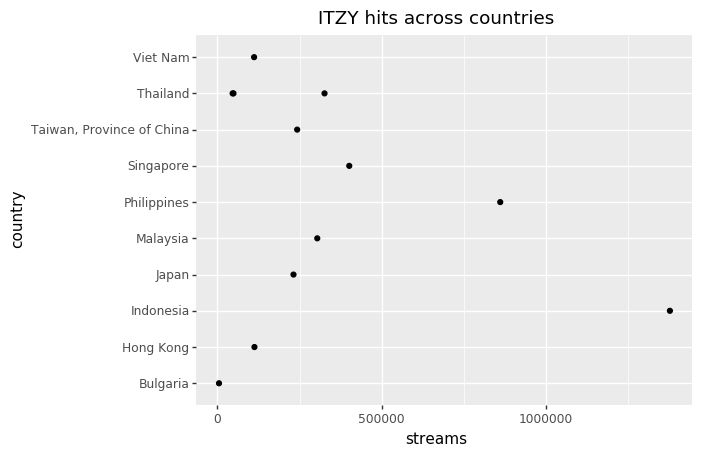

<ggplot: (300411810)>

In [4]:
(music_top200
  >> filter(_.artist == "ITZY")
  >> ggplot(aes("streams", "country")) + geom_point() + labs(title = "ITZY hits across countries")
)

> 🔨 Try changing the term `"ITZY"` to `"TIX"`. How many countries have TIX hits?

> 🔨 Try stopping the plot with a comment. That is, put `#` to the left of `>> ggplot`. This should show you the raw data.

<details>
    <summary>solution</summary>

Here is the solution code...
    
```python
# code with artist changed, and plot commented out
(music_top200
  >> filter(_.artist == "TIX")
  #>> ggplot(aes("streams", "country")) + geom_point() + labs(title = "ITZY hits across countries")
)
```

</details>

## Arrange

TODO: fill in explanation

In [5]:
(music_top200
  >> arrange(_.position, -_.danceability)
)

,country,country_code,position,track_name,artist,streams,track_id,danceability,energy,key,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,track_href,analysis_url,duration_ms,time_signature
6617,Italy,it,1,Bando,ANNA,2228788,0kzGjSRHGVcaWxagzQwAyD,0.970,0.739,10.0,...,0.2950,0.155000,0.000000,0.111,0.414,120.061,https://api.spotify.com/v1/tracks/0kzGjSRHGVca...,https://api.spotify.com/v1/audio-analysis/0kzG...,168000.0,4.0
10817,Slovakia,sk,1,Viac,Nerieš,107047,2eLTkjdcbBCTew9qvn6hzz,0.915,0.388,6.0,...,0.0382,0.058300,0.000229,0.106,0.760,110.004,https://api.spotify.com/v1/tracks/2eLTkjdcbBCT...,https://api.spotify.com/v1/audio-analysis/2eLT...,212727.0,4.0
1417,"Bolivia, Plurinational State of",bo,1,Si Veo a Tu Mamá,Bad Bunny,148430,41wtwzCZkXwpnakmwJ239F,0.900,0.603,2.0,...,0.0646,0.402000,0.000005,0.134,0.824,129.928,https://api.spotify.com/v1/tracks/41wtwzCZkXwp...,https://api.spotify.com/v1/audio-analysis/41wt...,170972.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12016,Uruguay,uy,200,Creo,Callejeros,11300,5Bi9Cq5oVFy1OtUgecbegZ,0.382,0.912,2.0,...,0.0551,0.001690,0.000008,0.233,0.560,187.941,https://api.spotify.com/v1/tracks/5Bi9Cq5oVFy1...,https://api.spotify.com/v1/audio-analysis/5Bi9...,289760.0,4.0
7816,Malta,mt,200,Wonderwall - Remastered,Oasis,1976,5qqabIl2vWzo9ApSC317sa,0.378,0.896,2.0,...,0.0407,0.000452,0.000000,0.194,0.469,174.302,https://api.spotify.com/v1/tracks/5qqabIl2vWzo...,https://api.spotify.com/v1/audio-analysis/5qqa...,258773.0,4.0
6816,Italy,it,200,7 miliardi,Massimo Pericolo,240815,67vjEOTkBppbVLUUq5mEJz,0.307,0.740,1.0,...,0.1400,0.032400,0.000678,0.486,0.362,142.920,https://api.spotify.com/v1/tracks/67vjEOTkBppb...,https://api.spotify.com/v1/audio-analysis/67vj...,167090.0,3.0


### Exercise 1: 

Below is code with the arrange verb removed. Modify it to arrange by artist name and popularity.

In [6]:
(music_top200
  >> ___
)

### Exercise 2:

Modify the code below to arrange by artist name in **descending** order. What is the track name of the `*NSYNC` song shown in the data?

In [7]:
(music_top200

)

,country,country_code,position,track_name,artist,streams,track_id,danceability,energy,key,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,track_href,analysis_url,duration_ms,time_signature
0,United States,us,1,The Box,Roddy Ricch,12987027,0nbXyq5TXYPCO7pr3N8S4I,0.896,0.586,10.0,...,0.0559,0.1040,0.00000,0.790,0.642,116.971,https://api.spotify.com/v1/tracks/0nbXyq5TXYPC...,https://api.spotify.com/v1/audio-analysis/0nbX...,196653.0,4.0
1,United States,us,2,Myron,Lil Uzi Vert,9163134,56uXDJRCuoS7abX3SkzHKQ,0.770,0.655,8.0,...,0.2960,0.0537,0.00000,0.215,0.584,155.039,https://api.spotify.com/v1/tracks/56uXDJRCuoS7...,https://api.spotify.com/v1/audio-analysis/56uX...,224955.0,4.0
2,United States,us,3,Blueberry Faygo,Lil Mosey,8043475,22LAwLoDA5b4AaGSkg6bKW,0.774,0.554,0.0,...,0.0383,0.2070,0.00000,0.132,0.349,99.034,https://api.spotify.com/v1/tracks/22LAwLoDA5b4...,https://api.spotify.com/v1/audio-analysis/22LA...,162547.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12414,South Africa,za,198,Black And White,Niall Horan,11771,7rpNuuoMbid56XkDsx2FjE,0.443,0.582,2.0,...,0.0482,0.0301,0.00000,0.127,0.239,147.589,https://api.spotify.com/v1/tracks/7rpNuuoMbid5...,https://api.spotify.com/v1/audio-analysis/7rpN...,193090.0,4.0
12415,South Africa,za,199,When I See U,Fantasia,11752,4iuNZTcvT9diFySSzVsnVS,0.569,0.596,8.0,...,0.1710,0.4570,0.00009,0.205,0.757,93.134,https://api.spotify.com/v1/tracks/4iuNZTcvT9di...,https://api.spotify.com/v1/audio-analysis/4iuN...,217347.0,4.0
12416,South Africa,za,200,Psycho!,MASE,11743,5LKkteRQ1wWv7XCIEA5F2q,0.868,0.365,7.0,...,0.0383,0.4330,0.00000,0.207,0.471,114.979,https://api.spotify.com/v1/tracks/5LKkteRQ1wWv...,https://api.spotify.com/v1/audio-analysis/5LKk...,197217.0,4.0


<details>
    <summary>solution</summary>

```python
(music_top200
  >> arrange(-_.artist)
)
```

</details>

## Select

TODO: fill in explanation

In [8]:
(music_top200
  >> select(_.country, _.position, _.track_name, _.artist, _.energy)
)

,country,position,track_name,artist,energy
0,United States,1,The Box,Roddy Ricch,0.586
1,United States,2,Myron,Lil Uzi Vert,0.655
2,United States,3,Blueberry Faygo,Lil Mosey,0.554
...,...,...,...,...,...
12414,South Africa,198,Black And White,Niall Horan,0.582
12415,South Africa,199,When I See U,Fantasia,0.596
12416,South Africa,200,Psycho!,MASE,0.365


### Exercise 1: removing country_code 

Make a small change the `select` below to remove the column `country_code` from the data, rather than include it.

In [9]:
(music_top200
  >> select(_.country_code)
)

,country_code
0,us
1,us
2,us
...,...
12414,za
12415,za
12416,za


### Exercise 2: arrange and select

Modify the code below to first arrange by number of `streams`, and then select `country` and `artist`

In [10]:
# combine select and arrange (what happens when try to arrange column that's selected out);
# (cont.) have comment out select, why does it work now?
(music_top200
  >> ___
  >> ___
)

## Filter: one condition

TODO: fill in explanation

In [11]:
(music_top200
  >> filter(_.country == "Hong Kong")
)

,country,country_code,position,track_name,artist,streams,track_id,danceability,energy,key,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,track_href,analysis_url,duration_ms,time_signature
5017,Hong Kong,hk,1,WANNABE,ITZY,112648,6tCssnvTUREcperDOUTqvA,0.809,0.911,6.0,...,0.0617,0.00795,0.000179,0.1810,0.640,122.035,https://api.spotify.com/v1/tracks/6tCssnvTUREc...,https://api.spotify.com/v1/audio-analysis/6tCs...,191242.0,4.0
5018,Hong Kong,hk,2,Intentions (feat. Quavo),Justin Bieber,104467,4umIPjkehX1r7uhmGvXiSV,0.806,0.546,9.0,...,0.0575,0.30000,0.000000,0.1020,0.874,147.986,https://api.spotify.com/v1/tracks/4umIPjkehX1r...,https://api.spotify.com/v1/audio-analysis/4umI...,212867.0,4.0
5019,Hong Kong,hk,3,Señorita,Shawn Mendes,84196,6v3KW9xbzN5yKLt9YKDYA2,0.759,0.548,9.0,...,0.0290,0.03920,0.000000,0.0828,0.749,116.967,https://api.spotify.com/v1/tracks/6v3KW9xbzN5y...,https://api.spotify.com/v1/audio-analysis/6v3K...,190800.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5214,Hong Kong,hk,198,Without You,高爾宣 OSN,19956,0KWnRv3wxjltYVB3MqjNd2,0.669,0.698,11.0,...,0.0910,0.57100,0.000000,0.1020,0.286,80.003,https://api.spotify.com/v1/tracks/0KWnRv3wxjlt...,https://api.spotify.com/v1/audio-analysis/0KWn...,175500.0,4.0
5215,Hong Kong,hk,199,Attention,Charlie Puth,19872,5cF0dROlMOK5uNZtivgu50,0.775,0.613,3.0,...,0.0542,0.10900,0.000023,0.1340,0.797,100.066,https://api.spotify.com/v1/tracks/5cF0dROlMOK5...,https://api.spotify.com/v1/audio-analysis/5cF0...,208787.0,4.0
5216,Hong Kong,hk,200,The Man,Taylor Swift,19868,3RauEVgRgj1IuWdJ9fDs70,0.777,0.658,0.0,...,0.0540,0.07670,0.000000,0.0901,0.633,110.048,https://api.spotify.com/v1/tracks/3RauEVgRgj1I...,https://api.spotify.com/v1/audio-analysis/3Rau...,190360.0,4.0


### Exercise 1: when code goes wrong

Why do you think this code returned 0 rows? Make the changes needed to get data back.

Hint: put a comment on the filter line to check the full data.

In [12]:
(music_top200
  >> filter(_.country == "United States of America")
)

,country,country_code,position,track_name,artist,streams,track_id,danceability,energy,key,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,track_href,analysis_url,duration_ms,time_signature


## Filter: two conditions

In [13]:
(music_top200
  >> filter(_.artist == "Roddy Ricch", _.position < 10)
)

,country,country_code,position,track_name,artist,streams,track_id,danceability,energy,key,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,track_href,analysis_url,duration_ms,time_signature
0,United States,us,1,The Box,Roddy Ricch,12987027,0nbXyq5TXYPCO7pr3N8S4I,0.896,0.586,10.0,...,0.0559,0.104,0.0,0.79,0.642,116.971,https://api.spotify.com/v1/tracks/0nbXyq5TXYPC...,https://api.spotify.com/v1/audio-analysis/0nbX...,196653.0,4.0
202,United Kingdom,gb,3,The Box,Roddy Ricch,2711921,0nbXyq5TXYPCO7pr3N8S4I,0.896,0.586,10.0,...,0.0559,0.104,0.0,0.79,0.642,116.971,https://api.spotify.com/v1/tracks/0nbXyq5TXYPC...,https://api.spotify.com/v1/audio-analysis/0nbX...,196653.0,4.0
623,Austria,at,7,The Box,Roddy Ricch,149891,0nbXyq5TXYPCO7pr3N8S4I,0.896,0.586,10.0,...,0.0559,0.104,0.0,0.79,0.642,116.971,https://api.spotify.com/v1/tracks/0nbXyq5TXYPC...,https://api.spotify.com/v1/audio-analysis/0nbX...,196653.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10217,Romania,ro,1,The Box,Roddy Ricch,92675,0nbXyq5TXYPCO7pr3N8S4I,0.896,0.586,10.0,...,0.0559,0.104,0.0,0.79,0.642,116.971,https://api.spotify.com/v1/tracks/0nbXyq5TXYPC...,https://api.spotify.com/v1/audio-analysis/0nbX...,196653.0,4.0
10820,Slovakia,sk,4,The Box,Roddy Ricch,57778,0nbXyq5TXYPCO7pr3N8S4I,0.896,0.586,10.0,...,0.0559,0.104,0.0,0.79,0.642,116.971,https://api.spotify.com/v1/tracks/0nbXyq5TXYPC...,https://api.spotify.com/v1/audio-analysis/0nbX...,196653.0,4.0
12217,South Africa,za,1,The Box,Roddy Ricch,94422,0nbXyq5TXYPCO7pr3N8S4I,0.896,0.586,10.0,...,0.0559,0.104,0.0,0.79,0.642,116.971,https://api.spotify.com/v1/tracks/0nbXyq5TXYPC...,https://api.spotify.com/v1/audio-analysis/0nbX...,196653.0,4.0


### Exercise 1: looking at The Weeknd's streams

How many times has The Weeknd had over 1,000,000 streams? Be sure to include `music_top200` on the first line.

<details>
    <summary>Hint:</summary>
    Do in steps. Run first to get all rows where the artist is The Weeknd, and then modify your code to get where he has over 1,000,000 streams.
</details>

In [14]:
(

)


()

## Mutate

TODO: fill in explanation

In [15]:
(music_top200
  >> mutate(streamed_ms = _.streams * _.duration_ms)
)

,country,country_code,position,track_name,artist,streams,track_id,danceability,energy,key,...,acousticness,instrumentalness,liveness,valence,tempo,track_href,analysis_url,duration_ms,time_signature,streamed_ms
0,United States,us,1,The Box,Roddy Ricch,12987027,0nbXyq5TXYPCO7pr3N8S4I,0.896,0.586,10.0,...,0.1040,0.00000,0.790,0.642,116.971,https://api.spotify.com/v1/tracks/0nbXyq5TXYPC...,https://api.spotify.com/v1/audio-analysis/0nbX...,196653.0,4.0,2.553938e+12
1,United States,us,2,Myron,Lil Uzi Vert,9163134,56uXDJRCuoS7abX3SkzHKQ,0.770,0.655,8.0,...,0.0537,0.00000,0.215,0.584,155.039,https://api.spotify.com/v1/tracks/56uXDJRCuoS7...,https://api.spotify.com/v1/audio-analysis/56uX...,224955.0,4.0,2.061293e+12
2,United States,us,3,Blueberry Faygo,Lil Mosey,8043475,22LAwLoDA5b4AaGSkg6bKW,0.774,0.554,0.0,...,0.2070,0.00000,0.132,0.349,99.034,https://api.spotify.com/v1/tracks/22LAwLoDA5b4...,https://api.spotify.com/v1/audio-analysis/22LA...,162547.0,4.0,1.307443e+12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12414,South Africa,za,198,Black And White,Niall Horan,11771,7rpNuuoMbid56XkDsx2FjE,0.443,0.582,2.0,...,0.0301,0.00000,0.127,0.239,147.589,https://api.spotify.com/v1/tracks/7rpNuuoMbid5...,https://api.spotify.com/v1/audio-analysis/7rpN...,193090.0,4.0,2.272862e+09
12415,South Africa,za,199,When I See U,Fantasia,11752,4iuNZTcvT9diFySSzVsnVS,0.569,0.596,8.0,...,0.4570,0.00009,0.205,0.757,93.134,https://api.spotify.com/v1/tracks/4iuNZTcvT9di...,https://api.spotify.com/v1/audio-analysis/4iuN...,217347.0,4.0,2.554262e+09
12416,South Africa,za,200,Psycho!,MASE,11743,5LKkteRQ1wWv7XCIEA5F2q,0.868,0.365,7.0,...,0.4330,0.00000,0.207,0.471,114.979,https://api.spotify.com/v1/tracks/5LKkteRQ1wWv...,https://api.spotify.com/v1/audio-analysis/5LKk...,197217.0,4.0,2.315919e+09


### Exercise 1 TODO: 

Use the code above, and modify it find the longest streamed (`streamed_ms`) song in Canada. Is it the song in the first `position`?

In [16]:
(

)

()

## Putting it together

TODO: explain


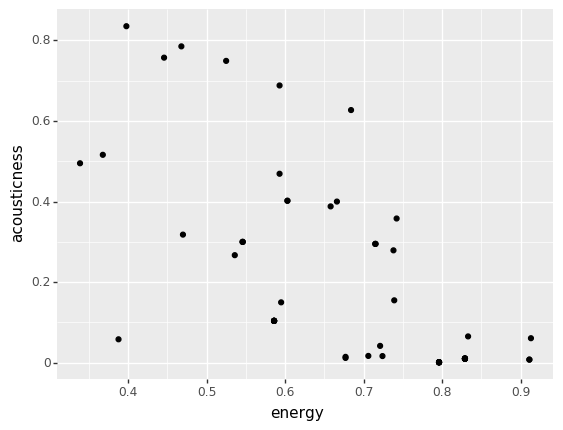

<ggplot: (300455467)>

In [17]:
(music_top200 
  >> filter(_.position == 1)
  >> select(_.country, _.energy, _.acousticness) 
  >> ggplot(aes("energy", "acousticness")) + geom_point()
)

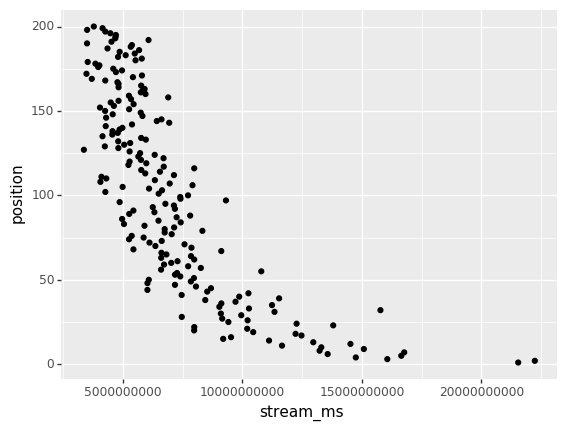

<ggplot: (300541651)>

In [18]:
# TODO: don't include hours, introduce a lot of baggage
#hours = 3600*1000 

(music_top200
  >> filter(_.country == "Hong Kong")
  >> mutate(stream_ms = _.streams * _.duration_ms)
#  >> mutate(stream_hours = (_.streams * _.duration_ms) / hours)
  >> select(_.stream_ms, _.position, _.acousticness, _.energy)
  >> ggplot(aes("stream_ms", "position")) + geom_point()
)

## Exercises

* What is Argentina's 10th most popular song? What's their most danceable song?
  (future note: we can't filter eg 10th most danceable yet)
* TODO: add more

Advanced

* Notice how we could filter songs in the 5th most streamed position, but not the 5th most danceable. (Show row_number called directly on Series, invite to put into mutate)

